In [ ]:
Penjelasan crisp dm 

In [ ]:
1. Business Understanding
Masalah :
Sepak Bola adal hal yang populer di dunia, sepak bola mencakup berbagai hiburan, atau kesehatan, 
namun disini kita akan analisis jumlah skor goal, yang dipengaruhi pemain atau tim dengan skor atau waktu tertentu.
Estimasi ini digunakan untuk membantu pelatih dalam latihan selanjutnya agar lebih maksimal. 

Data ini berisi Pemain Liga Inggriss,  nama team, nama pemain,  
waktu di mainkan, dan jumlah goal.

Tujuan : Prediksi jumlah goal dalam Premier Liga Inggris

Dataset ini dari kaggle "https://www.kaggle.com/datasets/themlphdstudent/premier-league-player-stats-data"

2. Data Understanding
Data ini berisi :

Rank : Peringkat pemain
Player : Nama pemain
Team : Nama tim pemain
GP : Game dimainkan
GS : Permainan dimulai
MIN : Menit dimainkan
G : Jumlah Goal
ASST : Assist
SHOTS : Total tembakan
SOG : Tembakan ke gawang

Berikut Beserta Tipea datanya :

Terdapat data int sebanyak 8 , object 2

 0   Rank    540 non-null    int64 
 1   PLAYER  540 non-null    object
 2   TEAM    540 non-null    object
 3   GP      540 non-null    int64 
 4   GS      540 non-null    int64 
 5   MIN     540 non-null    int64 
 6   G       540 non-null    int64 
 7   ASST    540 non-null    int64 
 8   SHOTS   540 non-null    int64 
 9   SOG     540 non-null    int64 

3. Data Preparation
Lalu tahap ini menentukan seleksi fitur dan label, yaitu
X : GP,GS,MIN,ASST,SHOTS,SOG
Y : G (Goal)

4. Modelling
Model Algoritma Regresi Linear

5. Evaluation
Lalu untuk mengetahui jumlah goal yang sudah dijelaskan di bussiness understanding, lalu diprediksi tingkat akurasi

6. Deployment
Lalu model ini did deploy melalui streamlit

# deskripsi library yang digunakan

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [13]:
df = pd.read_csv('Premier.csv')

# Deskripsi Dataset

In [14]:
df.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    540 non-null    int64 
 1   PLAYER  540 non-null    object
 2   TEAM    540 non-null    object
 3   GP      540 non-null    int64 
 4   GS      540 non-null    int64 
 5   MIN     540 non-null    int64 
 6   G       540 non-null    int64 
 7   ASST    540 non-null    int64 
 8   SHOTS   540 non-null    int64 
 9   SOG     540 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 42.3+ KB


<Axes: >

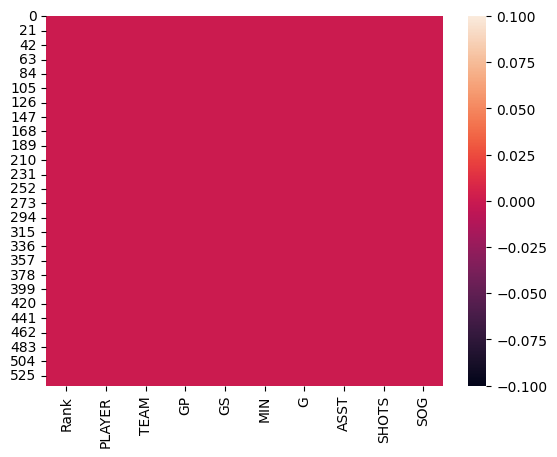

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.describe()

,Rank,GP,GS,MIN,G,ASST,SHOTS,SOG
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,270.500000,18.985185,15.090741,1353.657407,1.825926,1.275926,12.331481,5.909259
std,156.028843,12.847896,12.437641,1091.594162,3.551277,2.129346,16.651935,9.253446
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135.750000,7.000000,2.000000,241.500000,0.000000,0.000000,0.000000,0.000000
50%,270.500000,20.000000,13.500000,1219.500000,0.000000,0.000000,6.000000,2.000000
75%,405.250000,30.000000,26.000000,2295.500000,2.000000,2.000000,17.000000,7.000000
max,540.000000,38.000000,38.000000,3420.000000,23.000000,20.000000,95.000000,59.000000


# Visualisasi Data

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_2632\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

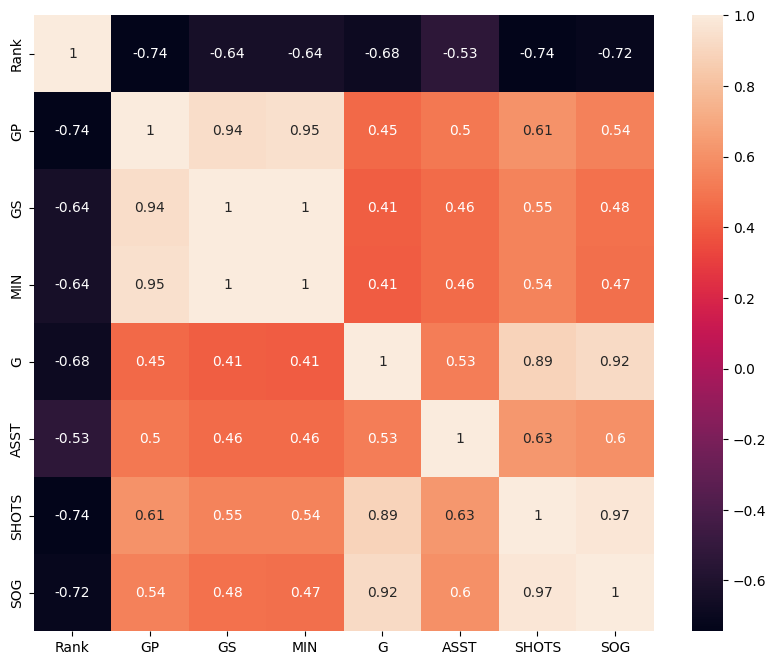

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Game Player berdasarkan Team

In [25]:
category = df.groupby('TEAM').count()[['GP']].sort_values(by='GP',ascending=True).reset_index()
category = category.rename(columns={'GP':'CategoryOfGamePlayer'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Wolverhampton Wanderers'),
  Text(1, 0, 'Brighton and Hove Albion'),
  Text(2, 0, 'Leicester City'),
  Text(3, 0, 'Everton'),
  Text(4, 0, 'Manchester City'),
  Text(5, 0, 'Sheffield United'),
  Text(6, 0, 'Aston Villa'),
  Text(7, 0, 'Chelsea'),
  Text(8, 0, 'Crystal Palace'),
  Text(9, 0, 'Southampton'),
  Text(10, 0, 'Watford'),
  Text(11, 0, 'Tottenham Hotspur'),
  Text(12, 0, 'Norwich City'),
  Text(13, 0, 'Liverpool'),
  Text(14, 0, 'Burnley'),
  Text(15, 0, 'Bournemouth'),
  Text(16, 0, 'Newcastle United'),
  Text(17, 0, 'Manchester United'),
  Text(18, 0, 'West Ham United'),
  Text(19, 0, 'Arsenal')])

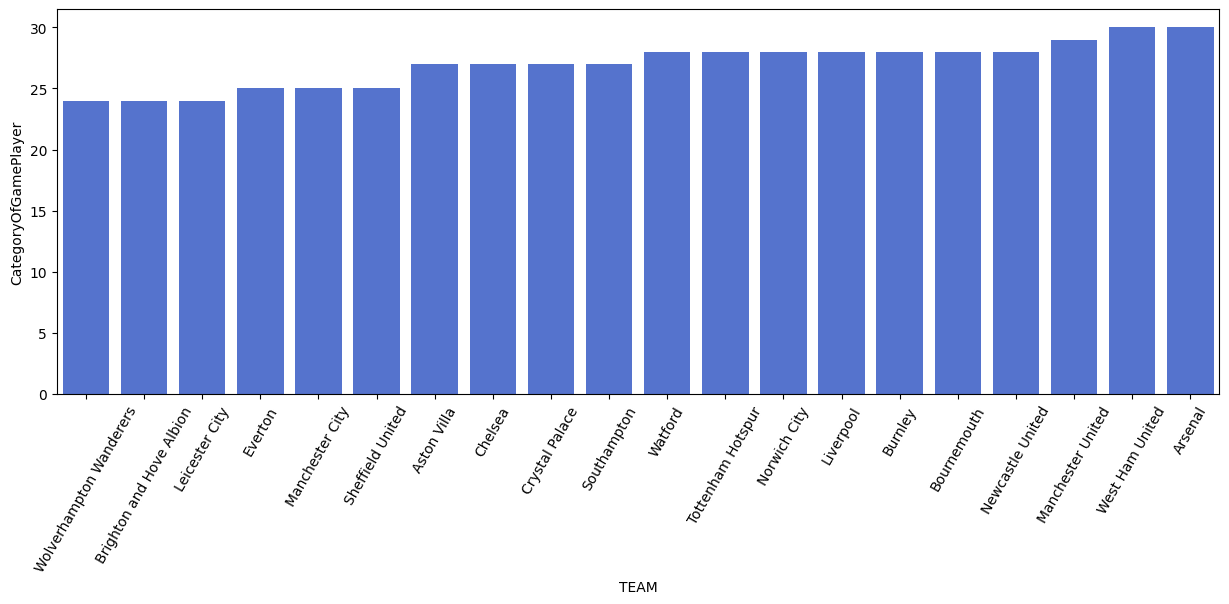

In [26]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=category['TEAM'], y=category['CategoryOfGamePlayer'], color='royalblue')
plt.xticks(rotation=60)

# distribusi Sodium

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_2632\821087739.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GS'])


<Axes: xlabel='GS', ylabel='Density'>

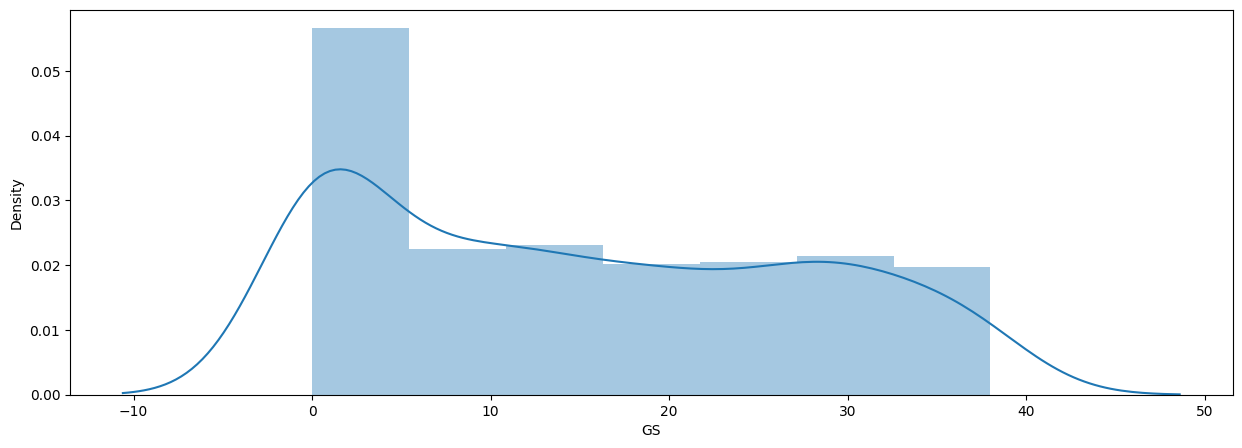

In [27]:
plt.figure(figsize=(15,5))
sns.distplot(df['GS'])

# distribusi Jumlah Goal

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_2632\1176521464.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['G'])


<Axes: xlabel='G', ylabel='Density'>

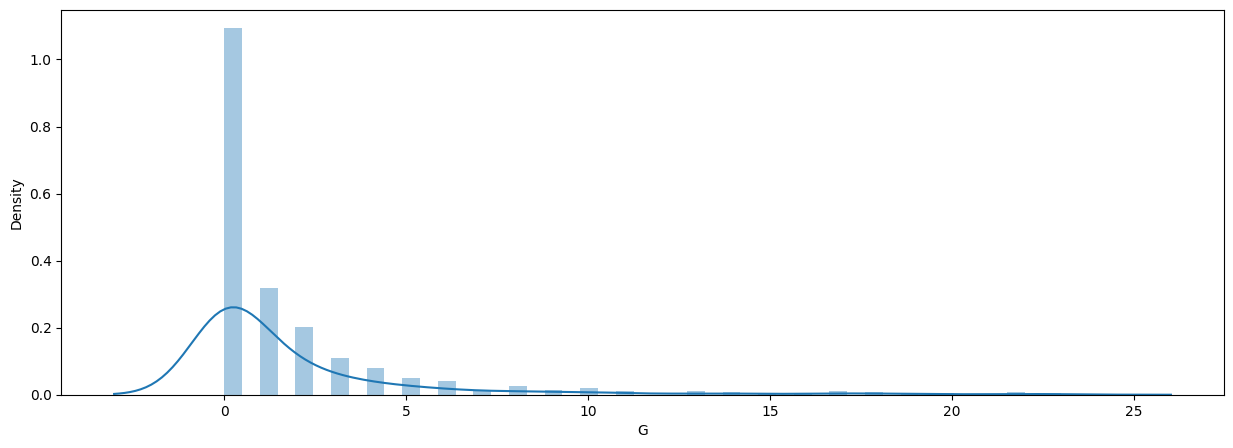

In [28]:
plt.figure(figsize=(15,5))
sns.distplot(df['G'])

# seleksi fitur

In [29]:
features = ['GP','GS','MIN','ASST','SHOTS','SOG']
x = df[features]
y = df['G']
x.shape, y.shape

((540, 6), (540,))

# split data training dan data testing

In [30]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(135,)

# membuat model regresi linier

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [32]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8383268767950185


# membuat inputan model regresi linier

In [33]:
input_data = np.array([[35,34,3034,5,71,43]])

prediction = lr.predict(input_data) 
print('Estimasi Jumlah Goal :', prediction)

Estimasi Jumlah Goal : [15.76292762]


c:\Users\Nurthariqa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [34]:
import pickle

filename = 'estimasi_goal.sav'
pickle.dump(lr,open(filename,'wb'))